This notebook takes a look at survey data, filling missing datavalues, calculating survey stats and plotting location data

In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns
import pdb

In [2]:
data=pd.read_csv('D:\Python_Projects\Survey_Data_Project\developer_survey_2020\survey_results_public.csv')

In [3]:
print(data.dtypes)
print(data.isnull().sum())
print(data.shape)


Respondent                        int64
MainBranch                       object
Hobbyist                         object
Age                             float64
Age1stCode                       object
CompFreq                         object
CompTotal                       float64
ConvertedComp                   float64
Country                          object
CurrencyDesc                     object
CurrencySymbol                   object
DatabaseDesireNextYear           object
DatabaseWorkedWith               object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
JobSeek                          object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object


In [4]:
#fill age with the average age in the age column, ensuring all ages are integers not floats. 
data['Age']=data['Age'].fillna(data['Age'].mean()).astype(int)
print(data['Age'].isnull().sum())

0


In [5]:
# for age 1st code, if the answer is 'younger than 5years', replace with 5
#indx=data[data['Age1stCode']=='Younger than 5 years'].index.values

#for i in indx:
#    data.loc[i, 'Age1stCode']=data.loc[i, 'Age1stCode'].replace(data.loc[i, 'Age1stCode'], '5')
    
    

In [6]:
# fill nans with value previously
data['Age1stCode']=data['Age1stCode'].fillna(0)

print(data['Age1stCode'].isnull().sum())


0


In [7]:
# print how many people in survey responded yes and no for 'hobbylist' question
data['Hobbyist'].value_counts()
# as a percentage
data['Hobbyist'].value_counts(normalize=True)

Yes    0.782228
No     0.217772
Name: Hobbyist, dtype: float64

In [8]:
# splitting up the hobbyists into yes and no groups

said_no=data[data['Hobbyist']=='No']
said_yes=data[data['Hobbyist']=='Yes']

print('Not hobbyists mean age', said_no['Age'].mean(),
      '\nHobbyists mean age', said_yes['Age'].mean()
      )

Not hobbyists mean age 31.67629027658968 
Hobbyists mean age 30.28536556322934


In [9]:
# people over 50
over50=data[data['Age']>=50]
under50= data[data['Age']< 50]
print('number over 50: ', over50.shape[0])
print('number under 50: ', under50.shape[0])

number over 50:  2270
number under 50:  62191


In [10]:
#hobbyists and non hibbyists under 50, as a percentage
print('hobbyists and non hobbyists under 50: ', over50['Hobbyist'].value_counts(normalize=True))

# number of hobbyists over 50
print('hobbyists over 50: ', over50[over50['Hobbyist']=='Yes'].shape[0])


hobbyists and non hobbyists under 50:  Yes    0.713656
No     0.286344
Name: Hobbyist, dtype: float64
hobbyists over 50:  1620


In [11]:
%matplotlib inline
# plotting data
country_count=data['Country'].value_counts()

In [12]:
# .isin() is used to check each and every value of the data frame satisfies the condition inside the 'isin' function or not.
country_cut= data.loc[data['Country'].isin(country_count.index[country_count>500])]
country_count_cut=country_cut['Country'].value_counts()
print(country_count_cut)

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Turkey                  777
Israel                  653
Switzerland             629
Bangladesh              609
Romania                 604
Nigeria                 593
Mexico                  540
Ukraine                 539
Austria                 539
Name: Country, dtype: int64


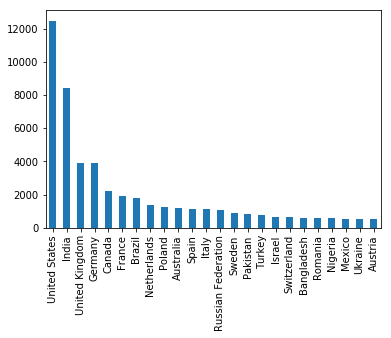

In [13]:
country_cut['Country'].value_counts().plot(kind="bar")


In [14]:
data['YearsCode']=data['YearsCode'].fillna(0)

In [15]:
uk_data=data[data['Country']=='United Kingdom']
uk_data.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
1,2,I am a developer by profession,No,30,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
9,10,I am a developer by profession,Yes,22,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
15,16,I am a developer by profession,Yes,45,8,Monthly,7000.0,108576.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,jQuery;React.js,Just as welcome now as I felt last year,50.0,37,23
29,30,I am a developer by profession,Yes,30,14,Yearly,30000.0,38778.0,United Kingdom,Pound sterling,...,Neither easy nor difficult,Too long,No,"Information systems, information technology, o...",Express;React.js;Vue.js,Express;Vue.js,A lot less welcome now than last year,37.0,4,2


In [16]:
uk_data.shape

(3896, 61)

In [17]:
# Hobbylist vs age
# small p-value (less than 0.05 or 0.1)
# reject the null hypothesis of identical ages - ie different ages
from scipy import stats
hobbyist = uk_data[uk_data['Hobbyist'] == 'Yes']['Age']
not_hobbyist = uk_data[uk_data['Hobbyist'] == 'No']['Age']

stats.ttest_ind(hobbyist, not_hobbyist)

Ttest_indResult(statistic=-6.2896367399933943, pvalue=3.5336735008680911e-10)